<a href="https://colab.research.google.com/github/GopikaJ15/Gopika-FODS-Assignment1/blob/main/Gopika_fods_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Head of DataFrame:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Data Types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         

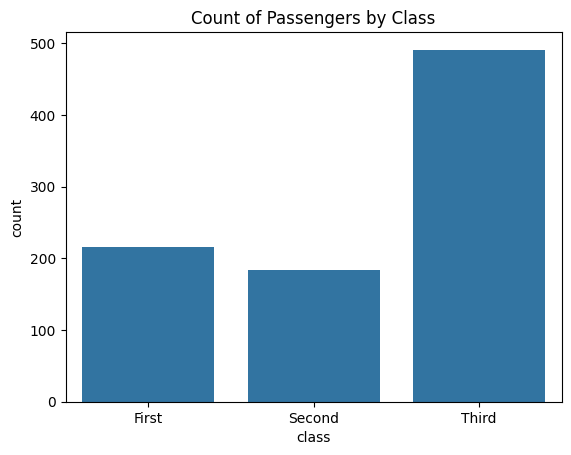


Correlation Matrix:
           survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500
age      -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688
sibsp    -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000


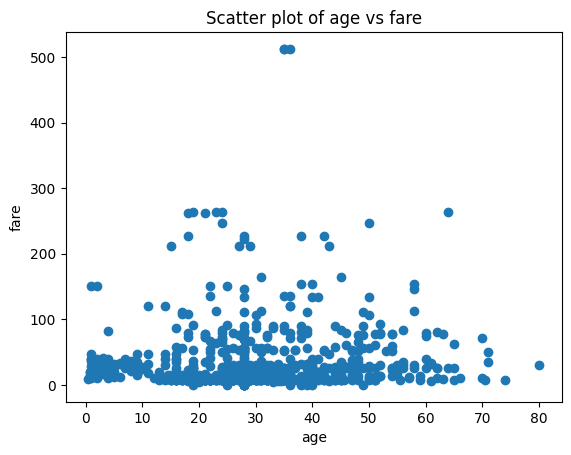

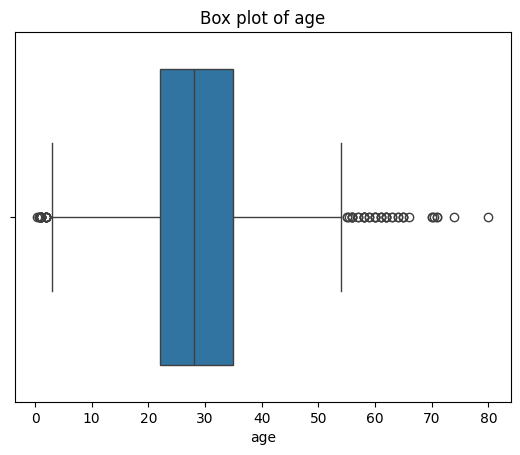

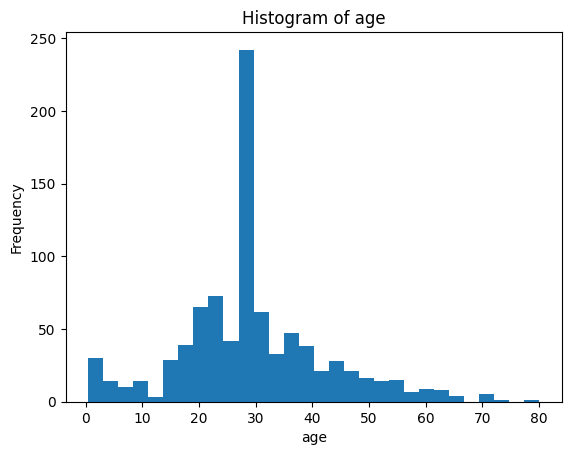

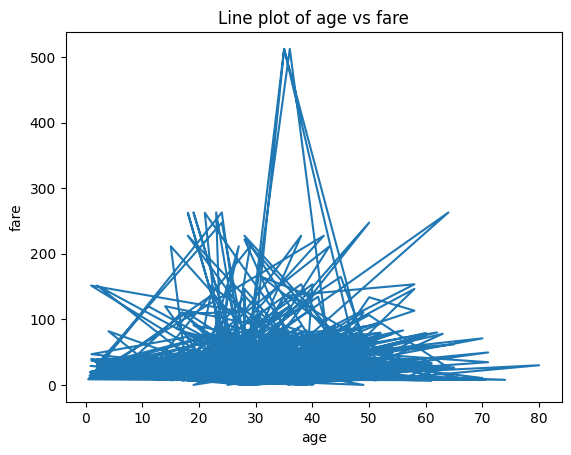

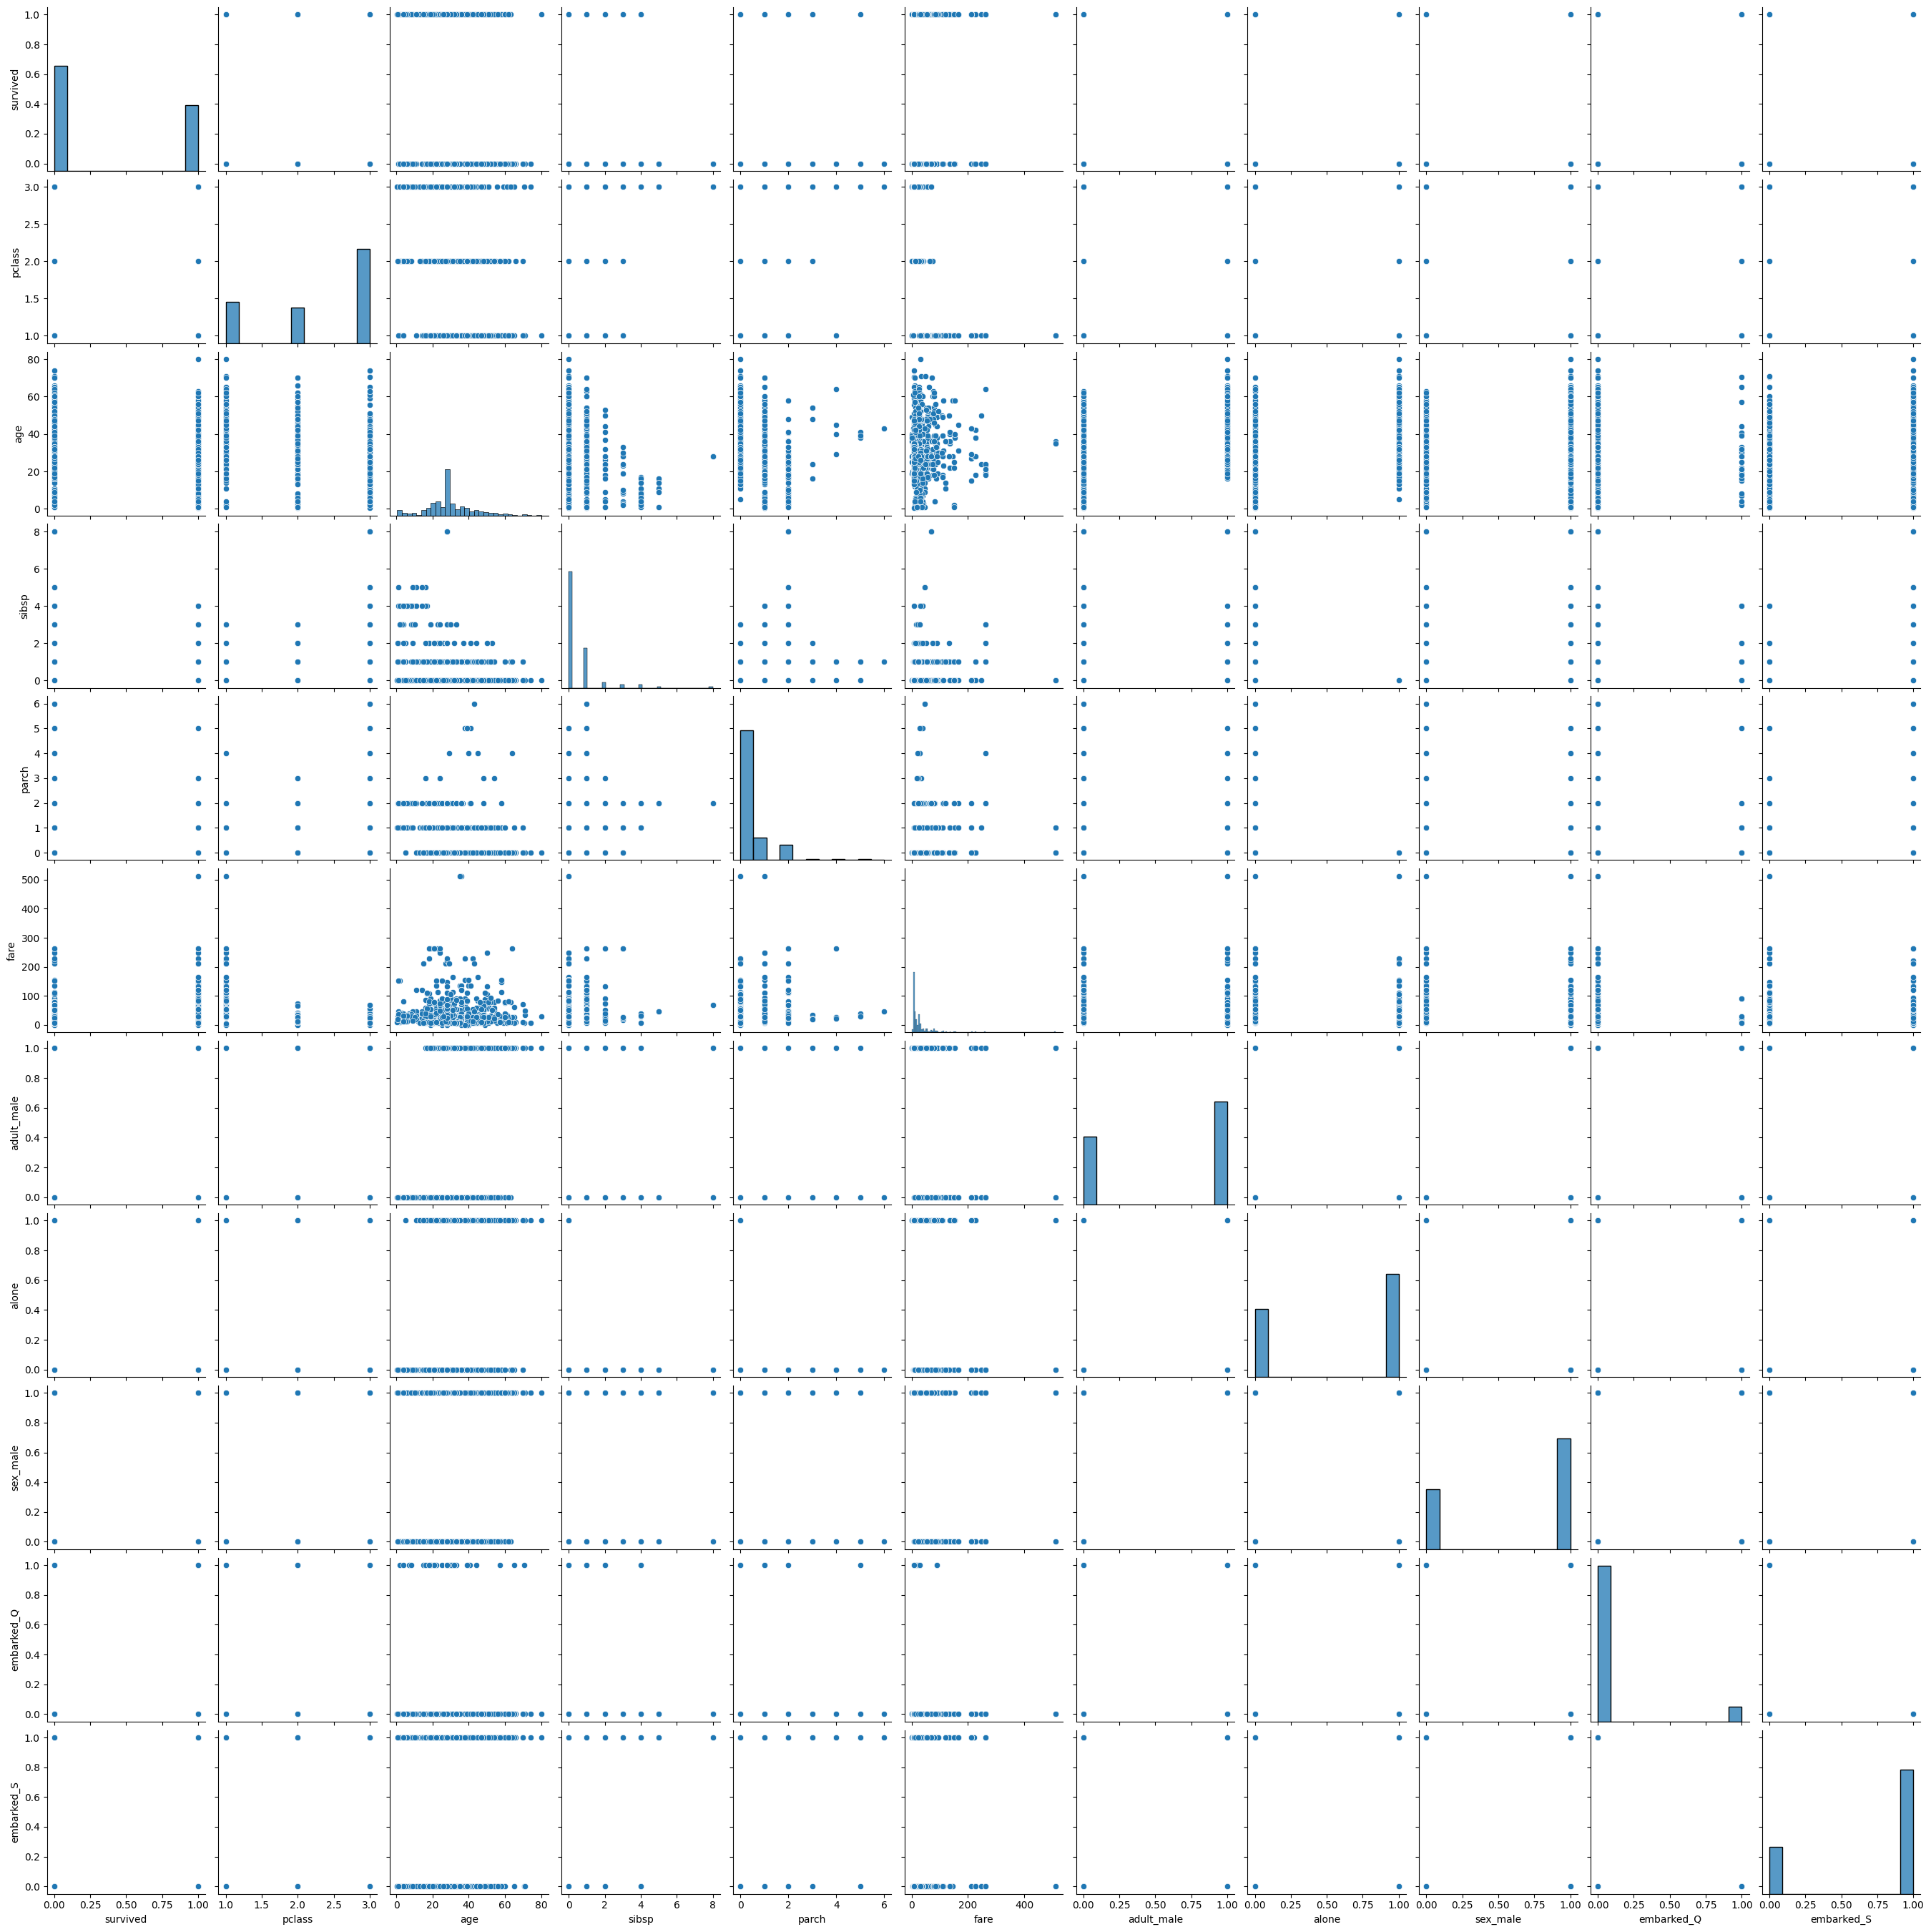

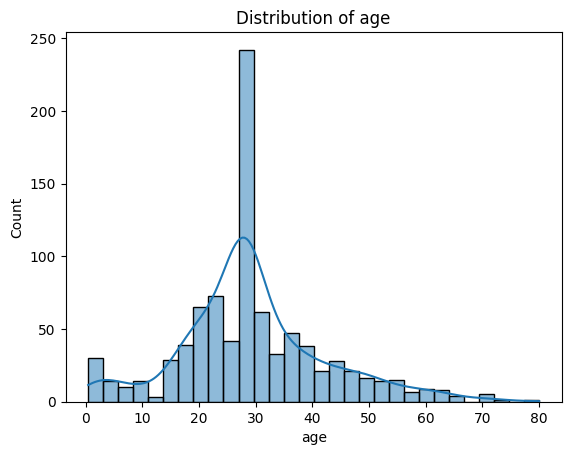


Cleaned data saved to 'cleaned_titanic_data.csv'


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
def load_data():
    df = sns.load_dataset('titanic')
    return df

# View first few rows
def view_head(df):
    return df.head()

# View data types
def view_dtypes(df):
    return df.dtypes

# Summary statistics
def summary_statistics(df):
    return df.describe(include='all')  # Include all data types in the summary

# Check for missing values
def check_missing_values(df):
    return df.isnull().sum()

# Fill missing values
def fill_missing_values(df):
    df = df.copy()  # Avoid changing the original DataFrame
    df['age'] = df['age'].fillna(df['age'].median())
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
    return df

# Drop missing values
def drop_missing_values(df):
    df = df.dropna()
    return df

# Encode categorical variables
def encode_categorical(df):
    df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
    return df

# Split data into features and target
def split_features_target(df):
    X = df.drop(['survived','class', 'who', 'deck', 'embark_town', 'alive'], axis=1, errors='ignore')
    y = df['survived']
    return X, y

# Train-test split
def train_test_split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

# Standardize features
def standardize_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Train a model
def train_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # Increased iterations for convergence
    model.fit(X_train, y_train)
    return model

# Make predictions
def make_predictions(model, X_test):
    return model.predict(X_test)

# Evaluate model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, class_report

# Visualize data
def visualize_data(df):
    sns.countplot(x='class', data=df)
    plt.title('Count of Passengers by Class')
    plt.show()

# Correlation matrix
def correlation_matrix(df):
  df_numeric = df.select_dtypes(include=np.number) # Select columns with numeric types
  return df_numeric.corr()

# Scatter plot
def scatter_plot(df, x, y):
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter plot of {x} vs {y}')
    plt.show()

# Box plot
def box_plot(df, column):
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Histogram
def histogram(df, column):
    plt.hist(df[column].dropna(), bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

# Line plot
def line_plot(df, x, y):
    plt.plot(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Line plot of {x} vs {y}')
    plt.show()

# Pair plot
def pair_plot(df):
    sns.pairplot(df)
    plt.show()

# Data distribution
def data_distribution(df, column):
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Save cleaned data
def save_data(df, filename):
    df.to_csv(filename, index=False)

# Main function to execute all steps
def main():
    df = load_data()
    print("Head of DataFrame:\n", view_head(df))
    print("\nData Types:\n", view_dtypes(df))
    print("\nSummary Statistics:\n", summary_statistics(df))
    print("\nMissing Values:\n", check_missing_values(df))

    df = fill_missing_values(df)
    print("\nMissing Values after Fill:\n", check_missing_values(df))

    df = encode_categorical(df)
    print("\nData after Encoding:\n", view_head(df))

    X, y = split_features_target(df)
    X_train, X_test, y_train, y_test = train_test_split_data(X, y)

    X_train_scaled, X_test_scaled = standardize_features(X_train, X_test)

    model = train_model(X_train_scaled, y_train)
    y_pred = make_predictions(model, X_test_scaled)

    accuracy, conf_matrix, class_report = evaluate_model(y_test, y_pred)
    print(f"\nAccuracy: {accuracy}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)

    print("\nVisualizations:")
    visualize_data(df)
    print("\nCorrelation Matrix:\n", correlation_matrix(df))
    scatter_plot(df, 'age', 'fare')
    box_plot(df, 'age')
    histogram(df, 'age')
    line_plot(df, 'age', 'fare')
    pair_plot(df)
    data_distribution(df, 'age')

    save_data(df, 'cleaned_titanic_data.csv')
    print("\nCleaned data saved to 'cleaned_titanic_data.csv'")

if __name__ == "__main__":
    main()
